In [1]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [2]:
t0=np.loadtxt('Prof_S.dat')
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9))

In [3]:
D = ((t0[:,1]+t0[:,3])*1e10/t0[:,6]-dgs)/dgs

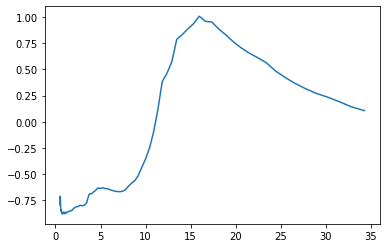

In [4]:
plt.plot(t0[:,0],D)

In [4]:
#ya tengo el perfil, ahora me fijo donde hay que hacer los cortes, -1/-0.8; -0.8/-0.6; etc...

In [5]:
cut0, = np.where(D<-0.8)
cut1, = np.where((D<-0.6) & (D>= -0.8))
cut2, = np.where((D<-0.4) & (D>= -0.6))
cut3, = np.where((D<-0.2) & (D>= -0.4))
cut4, = np.where((D<-0.0) & (D>= -0.2))

In [6]:
print('cortar en',np.max(t0[cut0,0]))
print('cortar en',np.max(t0[cut1,0]))
print('cortar en',np.max(t0[cut2,0]))
print('cortar en',np.max(t0[cut3,0]))
print('cortar en',np.max(t0[cut4,0]))
d0=np.max(t0[cut0,0])
d1=np.max(t0[cut1,0])
d2=np.max(t0[cut2,0])
d3=np.max(t0[cut3,0])
d4=np.max(t0[cut4,0])

cortar en 3.17385912
cortar en 8.08182049
cortar en 9.57884407
cortar en 10.4283371
cortar en 10.8809299


In [8]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s=pynbody.load(path+'snapshot_050')

In [9]:
g=s.gas
p=g['u']
len(p)

27240661

In [17]:
gas = s.gas
pos = gas['pos']
u   = gas['u']
ne  = gas['ne']
rho = gas['rho']

In [10]:
vel=s.dm['vel']

In [69]:
gas.loadable_keys()

['rho',
 'idgn',
 'pos',
 'ne',
 'iord',
 'smooth',
 'idch',
 'u',
 'sfr',
 'abvc',
 'mass',
 'nh',
 'vel']

In [98]:
ip  = gas['iord']

In [11]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021

xc=408.205481 -xbox+250
yc= 457.777839   -ybox+250
zc=441.538681-zbox+250

dist = np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)

NameError: name 'pos' is not defined

In [19]:
gs0, = np.where(dist < d0)
gs1, = np.where((dist >= d0) & (dist<d1))
gs2, = np.where((dist >= d1) & (dist<d2))
gs3, = np.where((dist >= d2) & (dist<d3))
gs4, = np.where((dist >= d3) & (dist<d4))
print('particulas en zona 0',len(gs0))
print('particulas en zona 1',len(gs1))
print('particulas en zona 2',len(gs2))
print('particulas en zona 3',len(gs3))
print('particulas en zona 4',len(gs4))

particulas en zona 0 1799
particulas en zona 1 52562
particulas en zona 2 75569
particulas en zona 3 91529
particulas en zona 4 79978


In [20]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu=(1.0-yHe)/(1+yHe+ne)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te=(5./3.-1.)*u*vv*mu*mp/kcgs
np.min(te)

SimArray(136.05946, dtype=float32)

Text(0.5, 1.0, '10.8809299')

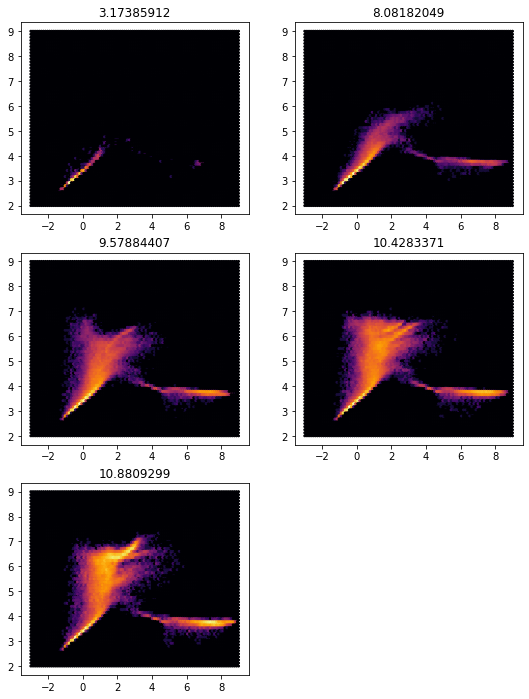

In [22]:
plt.figure(figsize=(9,12))

plt.subplot(321)
plt.hexbin(np.log10(rho[gs0]),np.log10(te[gs0]),bins='log',extent=(-3,9,2,9),cmap='inferno')
plt.title(d0)

plt.subplot(322)
plt.hexbin(np.log10(rho[gs1]),np.log10(te[gs1]),bins='log',extent=(-3,9,2,9),cmap='inferno')
plt.title(d1)

plt.subplot(323)
plt.hexbin(np.log10(rho[gs2]),np.log10(te[gs2]),bins='log',extent=(-3,9,2,9),cmap='inferno')
plt.title(d2)

plt.subplot(324)
plt.hexbin(np.log10(rho[gs3]),np.log10(te[gs3]),bins='log',extent=(-3,9,2,9),cmap='inferno')
plt.title(d3)

plt.subplot(325)
plt.hexbin(np.log10(rho[gs4]),np.log10(te[gs4]),bins='log',extent=(-3,9,2,9),cmap='inferno')
plt.title(d4)

#plt.subplot(326)
#plt.hexbin(np.log10(rho[gs0]),np.log10(te[gs0]),bins='log',extent=(-3,9,2,9),cmap='inferno')
#plt.title('12-18')

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/DFprof_S.png',format='png')

In [16]:
t=np.loadtxt('halosprop_S.dat')
s=t[np.argsort(t[:,0])]
withst, = np.where(s[:,8]>0)
s=s[withst,:]

In [17]:
cut0, = np.where(s[:,0]<d0)
cut1, = np.where((s[:,0]<d1) & (s[:,0]>=d0))
cut2, = np.where((s[:,0]<d2)& (s[:,0]>=d1))
cut3, = np.where((s[:,0]<d3)& (s[:,0]>=d2))
cut4, = np.where((s[:,0]<d4)& (s[:,0]>=d3))

In [18]:
masa_gas=1.81729961E-02
masa_dm=9.32880491E-02

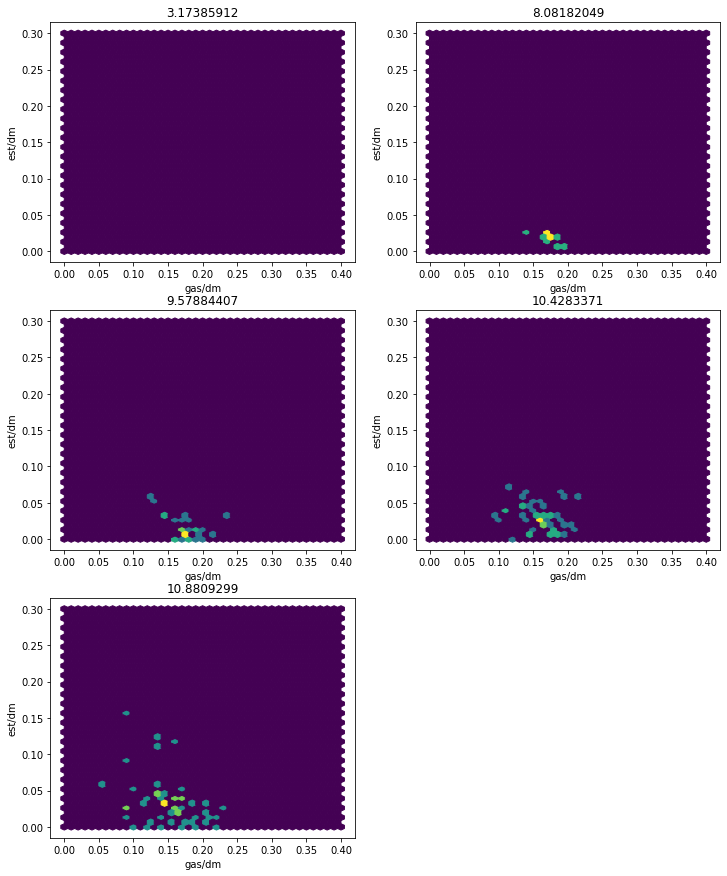

In [19]:
plt.figure(figsize=(12,15))

plt.subplot(321)
plt.hexbin((s[cut0,6]*masa_gas)/(s[cut0,7]*masa_dm),(s[cut0,9])/(s[cut0,7]*masa_dm),bins='log',extent=(0,0.4,0,0.3),gridsize=40)
plt.ylabel('est/dm')
plt.xlabel('gas/dm')
plt.title(d0)

plt.subplot(322)
plt.hexbin((s[cut1,6]*masa_gas)/(s[cut1,7]*masa_dm),(s[cut1,9])/(s[cut1,7]*masa_dm),bins='log',extent=(0,0.4,0,0.3),gridsize=40)
plt.ylabel('est/dm')
plt.xlabel('gas/dm')
plt.title(d1)

plt.subplot(323)
plt.hexbin((s[cut2,6]*masa_gas)/(s[cut2,7]*masa_dm),(s[cut2,9])/(s[cut2,7]*masa_dm),bins='log',extent=(0,0.4,0,0.3),gridsize=40)
plt.ylabel('est/dm')
plt.xlabel('gas/dm')
plt.title(d2)

plt.subplot(324)
plt.hexbin((s[cut3,6]*masa_gas)/(s[cut3,7]*masa_dm),(s[cut3,9])/(s[cut3,7]*masa_dm),bins='log',extent=(0,0.4,0,0.3),gridsize=40)
plt.ylabel('est/dm')
plt.xlabel('gas/dm')
plt.title(d3)

plt.subplot(325)
plt.hexbin((s[cut4,6]*masa_gas)/(s[cut4,7]*masa_dm),(s[cut4,9])/(s[cut4,7]*masa_dm),bins='log',extent=(0,0.4,0,0.3),gridsize=40)
plt.ylabel('est/dm')
plt.xlabel('gas/dm')
plt.title(d4)

plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/fraccionesDelta_S.png',format='png')

In [35]:
t0=np.loadtxt('Prof_R.dat')
D = ((t0[:,1]+t0[:,3])*1e10/t0[:,6]-dgs)/dgs
cut0, = np.where(D<-0.8)
cut1, = np.where((D<-0.6) & (D>= -0.8))
cut2, = np.where((D<-0.4) & (D>= -0.6))
cut3, = np.where((D<-0.2) & (D>= -0.4))
cut4, = np.where((D<0.0) & (D>= -0.2))

In [36]:
print('cortar en',np.max(t0[cut0,0]))
print('cortar en',np.max(t0[cut1,0]))
print('cortar en',np.max(t0[cut2,0]))
print('cortar en',np.max(t0[cut3,0]))
#print('cortar en',np.max(t0[cut4,0]))
d0=np.max(t0[cut0,0])
d1=np.max(t0[cut1,0])
d2=np.max(t0[cut2,0])
d3=np.max(t0[cut3,0])

cortar en 1.6781199
cortar en 8.79855156
cortar en 16.6408653
cortar en 34.2643585


In [37]:
path='/mnt/is2/dpaz/ITV/R1198/out/'
s=pynbody.load(path+'snapshot_050')
gas = s.gas
pos = gas['pos']
u   = gas['u']
ne  = gas['ne']
rho = gas['rho']

In [38]:
xbox=411.2170 
ybox=162.1655
zbox=453.0553

xc=413.621475 -xbox+250
yc= 162.604601   -ybox+250
zc=448.953638-zbox+250

dist = np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)

In [39]:
gs0, = np.where(dist < d0)
gs1, = np.where((dist >= d0) & (dist<d1))
gs2, = np.where((dist >= d1) & (dist<d2))
gs3, = np.where((dist >= d2) & (dist<d3))
#gs4, = np.where((dist >= d3) & (dist<d4))
print('particulas en zona 0',len(gs0))
print('particulas en zona 1',len(gs1))
print('particulas en zona 2',len(gs2))
print('particulas en zona 3',len(gs3))

particulas en zona 0 265
particulas en zona 1 77857
particulas en zona 2 682333
particulas en zona 3 8355802


In [40]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu=(1.0-yHe)/(1+yHe+ne)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te=(5./3.-1.)*u*vv*mu*mp/kcgs

Text(0.5, 1.0, '34.2643585')

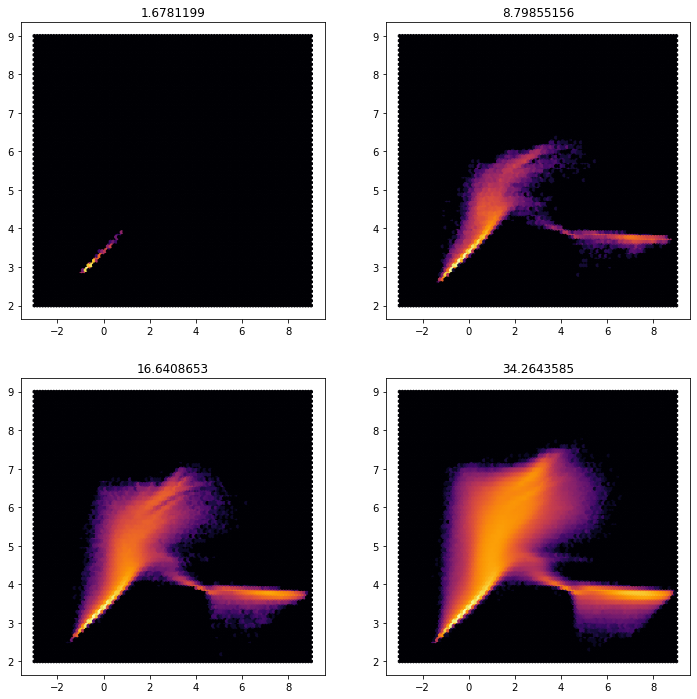

In [42]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.hexbin(np.log10(rho[gs0]),np.log10(te[gs0]),bins='log',extent=(-3,9,2,9),cmap='inferno')
plt.title(d0)

plt.subplot(222)
plt.hexbin(np.log10(rho[gs1]),np.log10(te[gs1]),bins='log',extent=(-3,9,2,9),cmap='inferno')
plt.title(d1)

plt.subplot(223)
plt.hexbin(np.log10(rho[gs2]),np.log10(te[gs2]),bins='log',extent=(-3,9,2,9),cmap='inferno')
plt.title(d2)

plt.subplot(224)
plt.hexbin(np.log10(rho[gs3]),np.log10(te[gs3]),bins='log',extent=(-3,9,2,9),cmap='inferno')
plt.title(d3)

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/DFprof_R.png',format='png')

In [ ]:
t=np.loadtxt('halosprop_R.dat')
s=t[np.argsort(t[:,0])]
withst, = np.where(s[:,8]>0)
s=s[withst,:]

In [ ]:
cut0, = np.where(s[:,0]<d0)
cut1, = np.where((s[:,0]<d1) & (s[:,0]>=d0))
cut2, = np.where((s[:,0]<d2)& (s[:,0]>=d1))
cut3, = np.where((s[:,0]<d3)& (s[:,0]>=d2))

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.hexbin((s[cut0,6]*masa_gas)/(s[cut0,7]*masa_dm),(s[cut0,9])/(s[cut0,7]*masa_dm),bins='log',extent=(0,0.4,0,0.3),gridsize=40)
plt.ylabel('est/dm')
plt.xlabel('gas/dm')
plt.title(d0)

plt.subplot(222)
plt.hexbin((s[cut1,6]*masa_gas)/(s[cut1,7]*masa_dm),(s[cut1,9])/(s[cut1,7]*masa_dm),bins='log',extent=(0,0.4,0,0.3),gridsize=40)
plt.ylabel('est/dm')
plt.xlabel('gas/dm')
plt.title(d1)

plt.subplot(223)
plt.hexbin((s[cut2,6]*masa_gas)/(s[cut2,7]*masa_dm),(s[cut2,9])/(s[cut2,7]*masa_dm),bins='log',extent=(0,0.4,0,0.3),gridsize=40)
plt.ylabel('est/dm')
plt.xlabel('gas/dm')
plt.title(d2)

plt.subplot(224)
plt.hexbin((s[cut3,6]*masa_gas)/(s[cut3,7]*masa_dm),(s[cut3,9])/(s[cut3,7]*masa_dm),bins='log',extent=(0,0.4,0,0.3),gridsize=40)
plt.ylabel('est/dm')
plt.xlabel('gas/dm')
plt.title(d3)

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/fraccionesDelta_R.png',format='png')

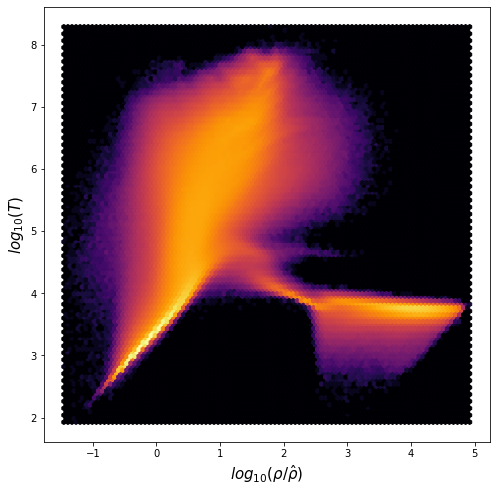

In [34]:
plt.figure(figsize=(8,8))
dmean=(np.mean((rho)))
plt.hexbin(np.log10(rho/dmean),np.log10(te),bins='log',cmap='inferno')
plt.xlabel('$log_{10}(\\rho / \hat{\\rho})$',size=15)
plt.ylabel('$log_{10}(T)$',size=15)
#plt.title(d3)
plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/DF.png',format='png')

In [52]:
dmean=np.mean(rho)
dmean

SimArray(5698361.5, dtype=float32, '1.00e+10 h**2 Msol a**-3 Mpc**-3')